In [1]:
### START REQUIRED PACKAGES

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from math import sqrt

sp.random.seed(30)

In [2]:
### Initial variables

L = 1 # SIZE OF BOX (For periodic conditions)

steps = 10**4

dt = 0.01

t_array = np.arange(dt,(steps+1)*dt,dt)

k = 1 # spring constant k = k_B T / 3 b^2 (b^2 = T / (3*k_B))
a = 1 # amplitude
τ = 1

In [3]:
### This defines the functions for the Rouse values

def Rouse(x,p):
    temp_values = np.zeros(N,float)
    
    for k in range(N):
        temp_values[k] = x[k]*np.cos(np.pi*p*k/N)*np.cos(np.pi*p*k/N)
        
    return sum(temp_values)

def Squarer(x,p):
    return sum((x[k]*np.cos(np.pi*p*k/N))**2 for k in range(N))

def Top_Value(x,y,p):
            
    return sum(x[i]*y[j]*np.cos(np.pi*p*i/N)*np.cos(np.pi*p*j/N) for i in range(N) for j in range(N))

In [4]:
### This defines the force

def harmonic(x):
    values = np.zeros(N,float)

    if N <= 2:
        values[0] = k*(x[1] - x[0])
        values[1] = k*(x[0] - x[1])
    else:
        values[0] = k*(x[1] - x[0])
        for j in range(1,N-1):
            values[j] = k*(x[j-1]-2*x[j]+x[j+1])
        values[N-1] = k*(x[N-2] - x[N-1])
        
    return values

### This gives increments to the Wiener process

def random(dt):
    a, b = sp.random.uniform(low=0.0,high=1.0), sp.random.uniform(low=0.0,high=1.0)
    
    return sqrt(-2*dt*np.log(a))*np.cos(2*np.pi*b)

In [5]:
k_b = 1 # boltzmann constant
m = 1 # mass of bead
b = 1 # average bonding length

### This defines the initial velocity with values from the Maxwell-Boltzmann distribution


def velocities(temp):
    sigma = sqrt(k_b*temp/m)
    
    array = np.random.normal(0,sigma,N)
    
    # Ensure no COM drift
    array -= sum(array)/float(N)
    
    # Rescale to set temperature
    scale_factor = (3*N*k_b*temp)/sum(array*array)
    
    array *= scale_factor
    
    return array

In [28]:
%%time
### This part is the main program

N = 10 # NUMBER OF PARTICLES
p = 10 # This sets the value of the pth mode
T = 5 # Temperature
rounds = 5 # number of runs

rouse_top = [[] for _ in range(rounds)]
rouse_bottom = [[] for _ in range(rounds)]


for j in range(rounds):
    # Set initial variables
    x = sp.random.uniform(low=0.0,high=L,size=N)
    x_start = np.copy(x)
    
    vx = velocities(T)
    
    rouse_top[j].append(Top_Value(x,x_start,p))
#     rouse_bottom[j].append(Squarer(x_start,p))
    rouse_bottom[j].append(Top_Value(x_start,x_start,p))
    
    wx = np.zeros(N,float)

    for k in range(N):
        wx[k] = sp.random.uniform(low=0.0,high=1.0)
        
    for k in range(steps):
            #update noise
        for l in range(N):
            wx[l] += random(dt)

            # update position
        x += dt*vx

            #update rouse
        rouse_top[j].append(Top_Value(x,x_start,p))
    #         rouse_bottom[j].append(Squarer(x_start,p))
        rouse_bottom[j].append(Top_Value(x_start,x_start,p))

            # update velocity
        vx += dt*(harmonic(x)+a*np.sin(sqrt(2/τ)*wx))
            
top_values = []
bottom_values = []
    
for counter in range(len(rouse_top[0])):
    temp_value_1 = 0
    temp_value_2 = 0
    
    for counter_2 in range(len(rouse_top)):
        temp_value_1 += rouse_top[counter_2][counter]
        temp_value_2 += rouse_bottom[counter_2][counter]
        
    top_values.append(temp_value_1/rounds)
    bottom_values.append(temp_value_2/rounds)
    
combined_values = [top_values[counter_3]/bottom_values[counter_3] for counter_3 in range(len(top_values))]
    
# np.savetxt("N10_p10_R5_T5.txt",combined_values)

print("Done")

Done
Wall time: 31.8 s


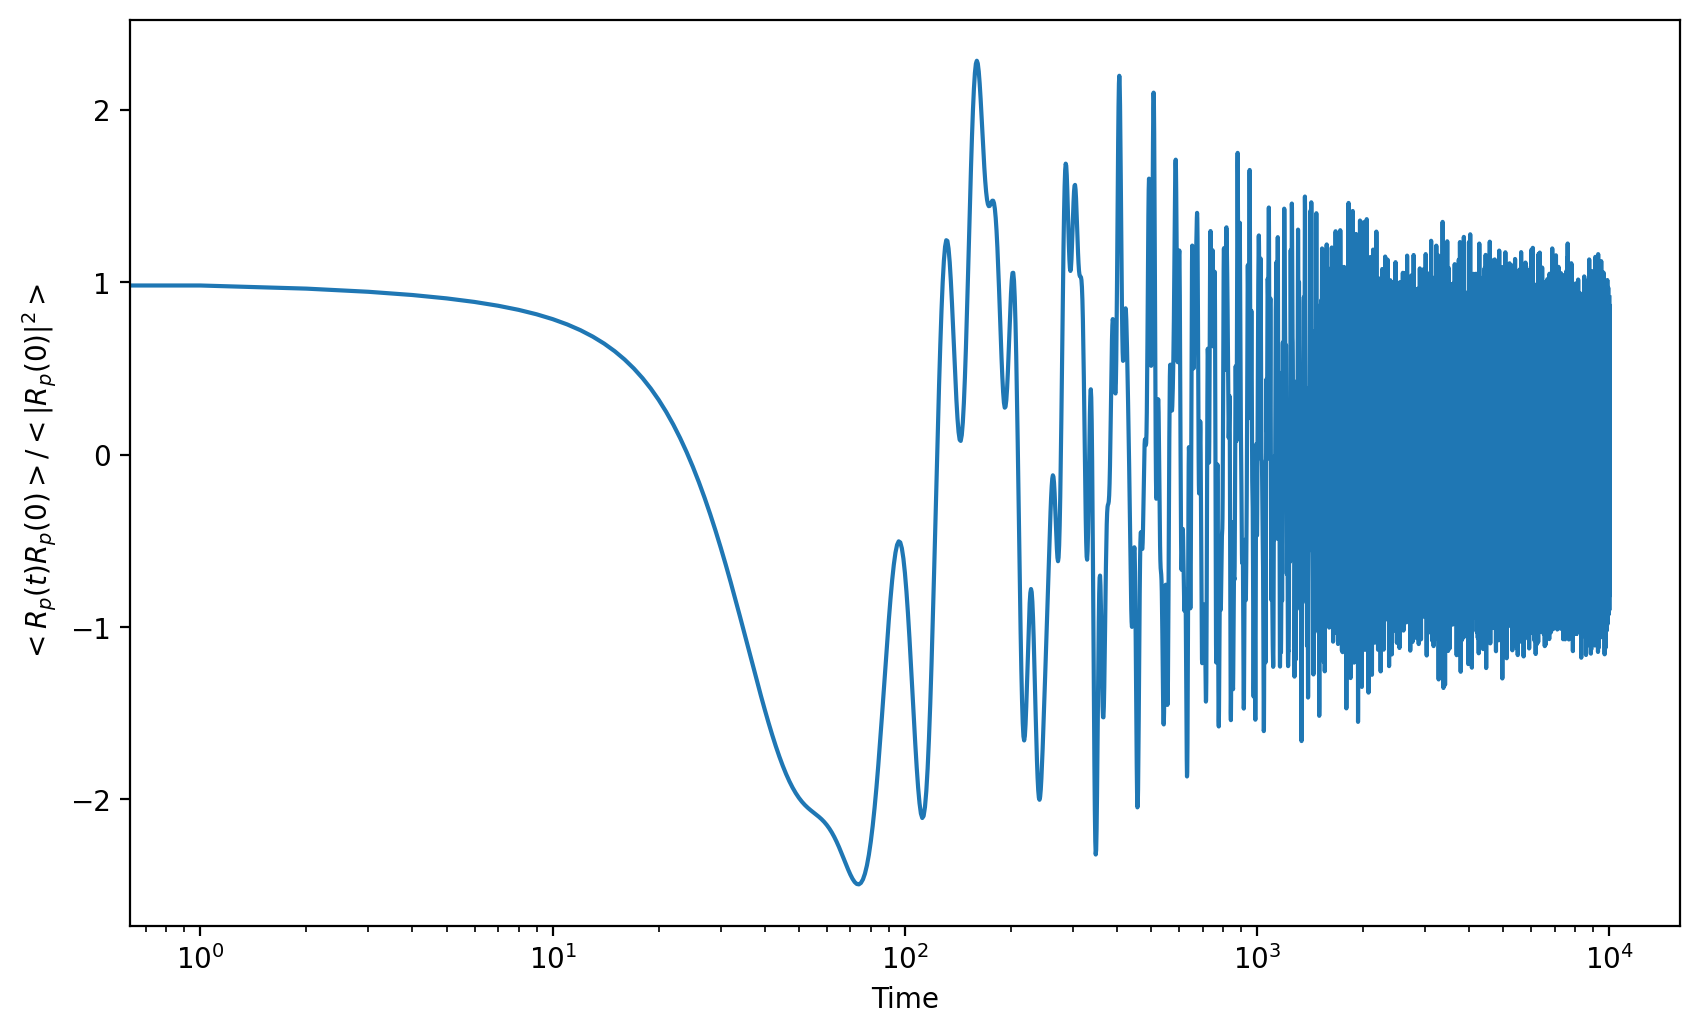

In [29]:
fig = plt.figure(figsize=(10, 6), dpi=200)
ax = fig.add_subplot(111)

plt.semilogx(combined_values)
plt.xlabel('Time')
plt.ylabel('$<R_p(t)R_p(0)>/<|R_p(0)|^2>$')
plt.show()

In [17]:
print(combined_values)

[1.0, 1.1157852130741914, 1.2316904263101165, 1.3476696939952448, 1.4636588364466259, 1.5796173379908895, 1.6954511171622886, 1.811084829409201, 1.9264341349577145, 2.0414232873009404, 2.1559730999979823, 2.269932654685857, 2.3832014812282676, 2.4956822195613335, 2.607249983643679, 2.7177932563195855, 2.8271882473175447, 2.9352922455136237, 3.0419283648820117, 3.146942444961173, 3.250181208045639, 3.351532404155433, 3.4508143575190724, 3.5478496333360816, 3.6425055076537025, 3.734604992046271, 3.823938469722176, 3.910282102673607, 3.993444852726037, 4.073232704008054, 4.1494310249643975, 4.221807388971271, 4.290151235825993, 4.354239835686726, 4.4138873849160465, 4.468876397032806, 4.518983322160712, 4.563953350477004, 4.603556906905034, 4.637519475771377, 4.665582727087681, 4.687502992592215, 4.703014313619861, 4.711849422961848, 4.713732441248605, 4.708406551940731, 4.695621017598824, 4.675121926123008, 4.6466897613852804, 4.610150486048587, 4.565320416001328, 4.511975528512021, 4.44